In [1]:
# dataanalisys stack

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import stat
from scipy.stats import kurtosis, skew, norm, mode


# SO
import os
import json
import re

In [44]:
dados = pd.read_csv('../../output_data/datasets/all_data.csv')

C:\Users\Cleiton - Financeiro\AppData\Local\Temp\ipykernel_16512\2228565897.py:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  dados = pd.read_csv('../../output_data/datasets/all_data.csv')


In [45]:
dados[dados.CPF_consulta == 8990249988] 

,id_pagas,date_pagas,undefined_pagas,CPF_pagas,provider_pagas,contrato_pagas,partiner_pagas,proventos_pagas,tabela,id_consulta,...,CPF_consulta,status_consulta,provider_key_consulta,created_consulta,update_consulta,partiner_consulta,message_consulta,CPF_storm,ADE,CMSRepassada
2035378,019981f1-4322-7e92-bad1-cd451cf85bda,2025-09-25,1.758825e+09,8.990250e+09,BMS,C252582BJTYUZU,7560.01_D067,"{""tac"": {""Percentual"": 44.0}, ""spread"": {""Perc...",6f5131ce-801b-4621-b65a-e73b7b34a3ff,6d9b56b1-8096-46a2-b089-383789f2a9ec,...,8990249988,failed,6d9b56b1-8096-46a2-b089-383789f2a9ec,2025-09-25 17:13:34.227256,2025-09-25 17:13:34.227256,7560.01_D067,NaN,8.990250e+09,373C252582BJTYUZU,56.51
2035381,019981f1-4322-7e92-bad1-cd451cf85bda,2025-09-25,1.758825e+09,8.990250e+09,BMS,C252582BJTYUZU,7560.01_D067,"{""tac"": {""Percentual"": 44.0}, ""spread"": {""Perc...",6f5131ce-801b-4621-b65a-e73b7b34a3ff,ec13ab1f-485a-4778-9256-e4375c632f79,...,8990249988,failed,ec13ab1f-485a-4778-9256-e4375c632f79,2025-09-25 17:13:35.656867,2025-09-25 17:13:35.656867,7560.01_D067,NaN,8.990250e+09,373C252582BJTYUZU,56.51
2035418,019981f1-4322-7e92-bad1-cd451cf85bda,2025-09-25,1.758825e+09,8.990250e+09,BMS,C252582BJTYUZU,7560.01_D067,"{""tac"": {""Percentual"": 44.0}, ""spread"": {""Perc...",6f5131ce-801b-4621-b65a-e73b7b34a3ff,60b862b3-3339-425f-9941-a0d461905b4a,...,8990249988,failed,60b862b3-3339-425f-9941-a0d461905b4a,2025-09-25 17:14:22.805764,2025-09-25 17:14:22.805764,7560.01_D067,NaN,8.990250e+09,373C252582BJTYUZU,56.51
2035936,019981f1-4322-7e92-bad1-cd451cf85bda,2025-09-25,1.758825e+09,8.990250e+09,BMS,C252582BJTYUZU,7560.01_D067,"{""tac"": {""Percentual"": 44.0}, ""spread"": {""Perc...",6f5131ce-801b-4621-b65a-e73b7b34a3ff,acc938e3-424e-40f4-9195-ae0dfba36a4e,...,8990249988,completed,acc938e3-424e-40f4-9195-ae0dfba36a4e,2025-09-25 17:23:57.711149,2025-09-25 17:23:57.711149,7560.01_D067,NaN,8.990250e+09,373C252582BJTYUZU,56.51


In [46]:
dados.columns

Index(['id_pagas', 'date_pagas', 'undefined_pagas', 'CPF_pagas',
       'provider_pagas', 'contrato_pagas', 'partiner_pagas', 'proventos_pagas',
       'tabela', 'id_consulta', 'provider_consulta', 'CPF_consulta',
       'status_consulta', 'provider_key_consulta', 'created_consulta',
       'update_consulta', 'partiner_consulta', 'message_consulta', 'CPF_storm',
       'ADE', 'CMSRepassada'],
      dtype='object')

In [47]:
## calcuilar conversao por create_at
# sucessos
sucesso = dados[(dados.status_consulta == 'completed') & (dados.CPF_pagas.notna())][['created_consulta', 'status_consulta', 'CPF_consulta']]

In [48]:
sucesso[sucesso.duplicated(subset='CPF_consulta')]

,created_consulta,status_consulta,CPF_consulta
15701,2025-09-01 04:54:51.816689,completed,9528082939
18575,2025-09-01 05:46:17.740888,completed,28084376845
19883,2025-09-01 06:15:47.046816,completed,6059211720
21886,2025-09-01 07:16:26.223620,completed,45876276820
21912,2025-09-01 07:17:14.734334,completed,32385364867
...,...,...,...
2284935,2025-09-28 23:24:17.298385,completed,1879787784
2284940,2025-09-28 23:24:22.763010,completed,2172367907
2285454,2025-09-28 23:35:07.334400,completed,9288363980
2286068,2025-09-28 23:48:18.838042,completed,11820987620


In [49]:
index_drop = sucesso.index

In [50]:
sem_sucesso = dados.loc[~dados.index.isin(index_drop), ['created_consulta', 'status_consulta', 'CPF_consulta']]

In [51]:
sem_sucesso

,created_consulta,status_consulta,CPF_consulta
0,2025-09-01 00:00:00.972400,failed,2429916100
1,2025-09-01 00:00:04.695924,failed,9702514916
2,2025-09-01 00:00:05.064011,failed,2483824200
3,2025-09-01 00:00:05.075418,failed,40378791826
4,2025-09-01 00:00:08.340843,completed,22858008
...,...,...,...
2286604,2025-09-28 23:59:54.842211,failed,71048445208
2286605,2025-09-28 23:59:54.873518,failed,53471563687
2286606,2025-09-28 23:59:54.980850,failed,9038568592
2286607,2025-09-28 23:59:56.059465,completed,15438494827


### Agrupando

In [52]:
## sucesso
sucesso['created_consulta'] = pd.to_datetime(sucesso['created_consulta']).dt.strftime('%Y-%m-%d %H:%M')
counts_sucesso = sucesso['created_consulta'].value_counts()
df_sucesso = pd.DataFrame(counts_sucesso)
#df_sucesso['datetime'] = df_sucesso.index
df_sucesso.reset_index(inplace=True)
df_sucesso.columns = ['created_consulta', 'count_pagas']

In [53]:
df_sucesso

,created_consulta,count_pagas
0,2025-09-08 12:21,17
1,2025-09-12 12:28,16
2,2025-09-08 13:18,16
3,2025-09-08 11:16,15
4,2025-09-25 12:57,15
...,...,...
28778,2025-09-14 16:44,1
28779,2025-09-14 16:45,1
28780,2025-09-14 16:48,1
28781,2025-09-14 17:00,1


In [54]:
## sucesso
sem_sucesso['created_consulta'] = pd.to_datetime(sem_sucesso['created_consulta']).dt.strftime('%Y-%m-%d %H:%M')
counts_sem_sucesso = sem_sucesso['created_consulta'].value_counts()
df_sem_sucesso = pd.DataFrame(counts_sem_sucesso)
#df_sem_sucesso['datetime'] = df_sem_sucesso.index
df_sem_sucesso.reset_index(inplace=True)
df_sem_sucesso.columns = ['created_consulta', 'count_nao_pagas']

In [55]:
df_sem_sucesso

,created_consulta,count_nao_pagas
0,2025-09-02 00:35,151
1,2025-09-01 22:51,146
2,2025-09-08 21:45,140
3,2025-09-02 00:57,137
4,2025-09-02 00:58,137
...,...,...
38505,2025-09-20 08:07,3
38506,2025-09-20 08:03,3
38507,2025-09-24 04:38,2
38508,2025-09-20 08:04,2


In [56]:
## merge 
teste = pd.merge(left=df_sem_sucesso, right=df_sucesso, on='created_consulta', how='outer')

In [57]:
teste.fillna(0, inplace=True)

In [58]:
teste.sample(5)

,created_consulta,count_nao_pagas,count_pagas
14725,2025-09-11 05:25,77,2.0
22002,2025-09-16 06:42,92,0.0
6437,2025-09-05 11:17,57,3.0
5749,2025-09-04 23:49,87,2.0
20549,2025-09-15 06:29,74,0.0


In [59]:
teste['total_consultas'] = teste['count_nao_pagas'] + teste['count_pagas']
teste['conversao'] = round(teste['count_pagas'] / teste['total_consultas'], 2)

In [18]:
teste.sort_values(by='created_consulta', inplace=True)
teste

,created_consulta,count_nao_pagas,count_pagas,total_consultas,conversao
0,2025-09-01 00:00,32,0.0,32.0,0.00
1,2025-09-01 00:01,29,0.0,29.0,0.00
2,2025-09-01 00:02,36,0.0,36.0,0.00
3,2025-09-01 00:03,34,1.0,35.0,0.03
4,2025-09-01 00:04,30,1.0,31.0,0.03
...,...,...,...,...,...
38505,2025-09-28 23:55,43,0.0,43.0,0.00
38506,2025-09-28 23:56,49,1.0,50.0,0.02
38507,2025-09-28 23:57,51,0.0,51.0,0.00
38508,2025-09-28 23:58,43,0.0,43.0,0.00


In [20]:
teste['created_consulta'] = pd.to_datetime(teste['created_consulta'])

<Axes: xlabel='created_consulta', ylabel='conversao'>

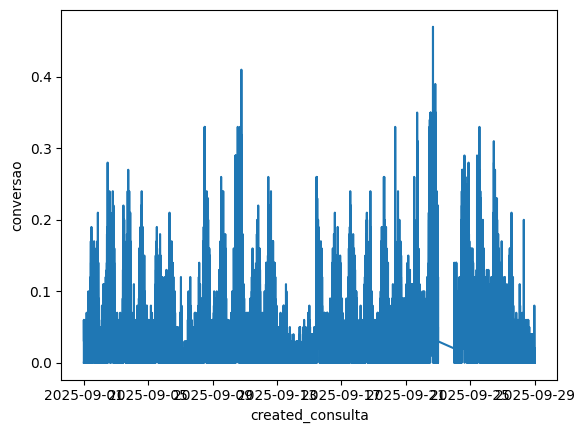

In [21]:
sns.lineplot(data=teste, y = 'conversao', x = 'created_consulta')

In [22]:
teste['retorno_total'] = round(teste['total_consultas'] / teste['total_consultas'].shift(), 2)
teste['retorno_conversao'] = round(teste['conversao'] / teste['conversao'].shift(), 2)


0        2025-09-01 00:00
1        2025-09-01 00:01
2        2025-09-01 00:02
3        2025-09-01 00:03
4        2025-09-01 00:04
               ...       
38505    2025-09-28 23:55
38506    2025-09-28 23:56
38507    2025-09-28 23:57
38508    2025-09-28 23:58
38509    2025-09-28 23:59
Name: created_consulta, Length: 38510, dtype: object

In [ ]:
teste.set_index(teste['created_consulta'], inplace=True)
plot = teste[['total_consultas', 'count_pagas']].resample("D").sum()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

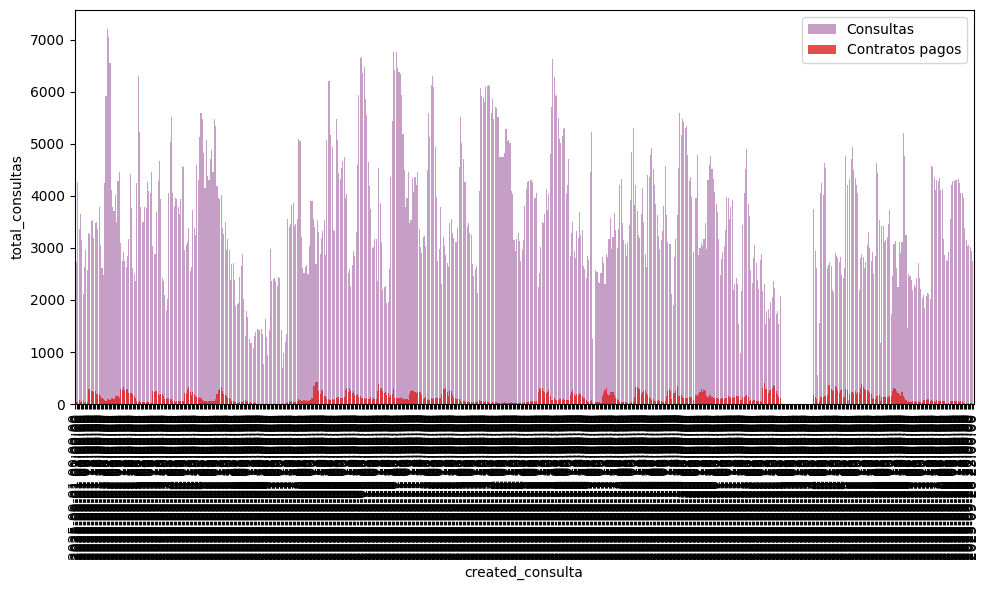

In [39]:
plt.figure(figsize=(10, 6))
sns.barplot(data = teste, x = 'created_consulta', y = 'total_consultas', alpha = .4, color = 'purple', label = 'Consultas')
sns.barplot(data = teste, x = 'created_consulta', y = 'count_pagas', alpha = .8, color = 'red', label='Contratos pagos')
plt.xticks(rotation = 90)
plt.tight_layout()

In [24]:
## decompondo séries
teste.replace([np.inf, -np.inf], np.nan, inplace=True)

In [25]:
teste['retorno_conversao'].fillna(method='bfill', inplace=True)
teste['retorno_total'].fillna(method='bfill', inplace=True)

C:\Users\Cleiton - Financeiro\AppData\Local\Temp\ipykernel_16512\2481142572.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  teste['retorno_conversao'].fillna(method='bfill', inplace=True)
C:\Users\Cleiton - Financeiro\AppData\Local\Temp\ipykernel_16512\2481142572.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  teste['retorno_conversao'].fillna(method='bfill', inplace=True)
C:\Users\Cleiton - Financeiro\AppData\Local\Temp\ipykernel_

In [27]:
teste['cumsum_consultas_retorno'] = np.cumsum(teste['retorno_total'])
teste['cumsum_total_conversao'] = np.cumsum(teste['retorno_conversao'])


In [28]:
teste.dropna(inplace=True)

In [29]:
teste.columns

Index(['created_consulta', 'count_nao_pagas', 'count_pagas', 'total_consultas',
       'conversao', 'retorno_total', 'retorno_conversao',
       'cumsum_consultas_retorno', 'cumsum_total_conversao'],
      dtype='object')

In [30]:
teste = teste[['total_consultas', 'count_pagas']].resample('H').sum()

C:\Users\Cleiton - Financeiro\AppData\Local\Temp\ipykernel_16512\2586179442.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  teste = teste[['total_consultas', 'count_pagas']].resample('H').sum()


<Axes: ylabel='Density'>

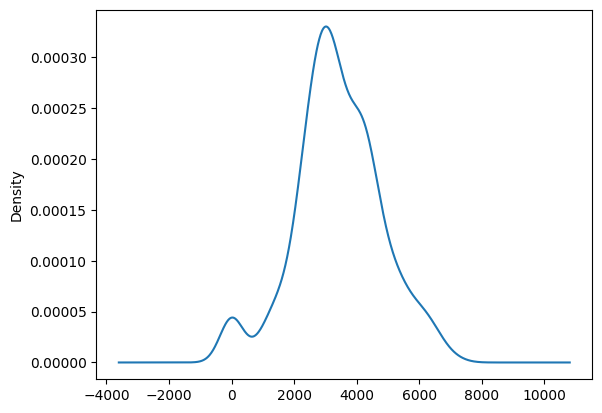

In [31]:
teste.total_consultas.plot(kind='kde')

<Axes: ylabel='Density'>

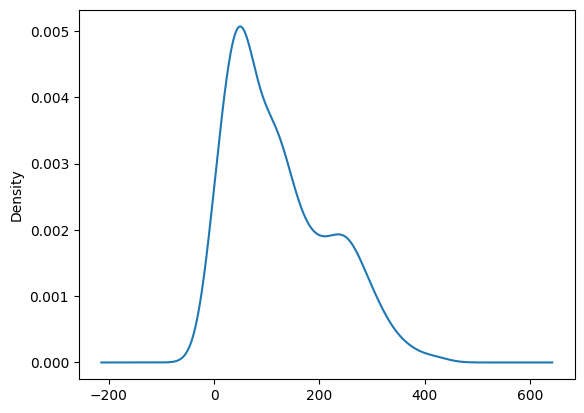

In [32]:
teste.count_pagas.plot(kind='kde')

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose
# decompondo consultas
consult_decompose = seasonal_decompose(teste['total_consultas'], model='additive', period=60)
convert_decompose = seasonal_decompose(teste['count_pagas'], model='additive', period=60)

(array([20332., 20336., 20340., 20344., 20348., 20352., 20356.]),
 [Text(20332.0, 0, '2025-09-01'),
  Text(20336.0, 0, '2025-09-05'),
  Text(20340.0, 0, '2025-09-09'),
  Text(20344.0, 0, '2025-09-13'),
  Text(20348.0, 0, '2025-09-17'),
  Text(20352.0, 0, '2025-09-21'),
  Text(20356.0, 0, '2025-09-25')])

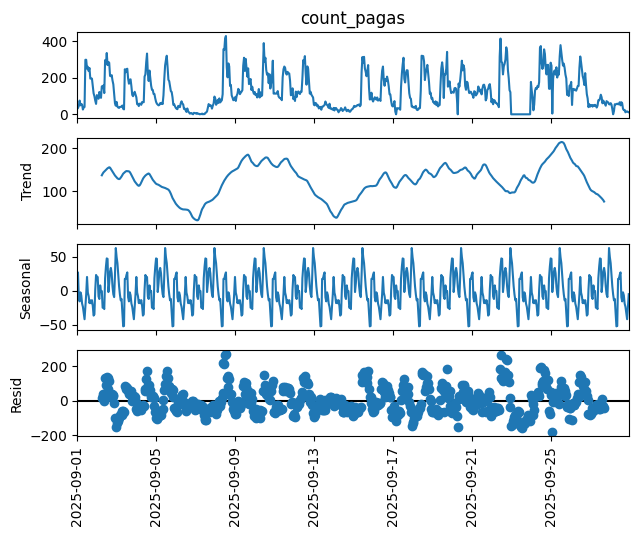

In [34]:
convert_decompose.plot()
plt.xticks(rotation = 90)

(array([20332., 20336., 20340., 20344., 20348., 20352., 20356.]),
 [Text(20332.0, 0, '2025-09-01'),
  Text(20336.0, 0, '2025-09-05'),
  Text(20340.0, 0, '2025-09-09'),
  Text(20344.0, 0, '2025-09-13'),
  Text(20348.0, 0, '2025-09-17'),
  Text(20352.0, 0, '2025-09-21'),
  Text(20356.0, 0, '2025-09-25')])

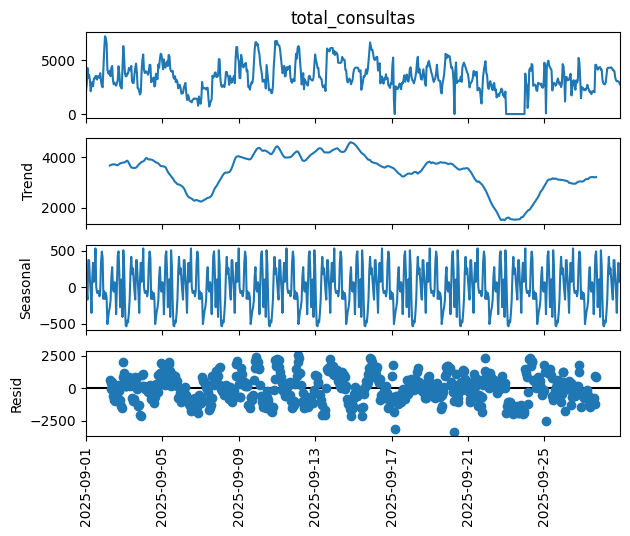

In [35]:
consult_decompose.plot()
plt.xticks(rotation = 90)